# Spam Filter Classifier.

## Import and sort the data

In [21]:
import pandas as pd
import numpy as np
import string

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# For the Visualisation
from os import path
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from IPython.display import Image


In [3]:
# Read datasets
test_data = pd.read_csv('TestDataset.csv', names=['text'])
train_data_1 = pd.read_csv('TrainDataset1.csv', names=['tag','text'])
train_data_2 = pd.read_csv('TrainDataset2.csv', names=['tag','text'])
train_data_3 = pd.read_csv('TrainDataset3.txt', sep="\t", names=['tag','text'])

text = train_data_1['text'].tolist() + train_data_2['text'].tolist() + train_data_3['text'].tolist()
tags = train_data_1['tag'].tolist() + train_data_2['tag'].tolist() + train_data_3['tag'].tolist()

test_text = test_data['text']


## Visualise the data

In [29]:
# Generate strings for wordcloud
ham_text = " ".join([words for words, tag in zip(text, tags) if tag == "ham"])
spam_text = " ".join([words for words, tag in zip(text, tags) if tag == "spam"])

# Generate wordcloud
ham_wordcloud = WordCloud(height=500, width=500, background_color='white').generate(ham_text)
spam_wordcloud = WordCloud(height=500, width=500, background_color='white').generate(spam_text)

# Save wordclouds
ham_wordcloud.to_file("img/ham_wordcloud.jpg")
spam_wordcloud.to_file("img/spam_wordcloud.jpg")

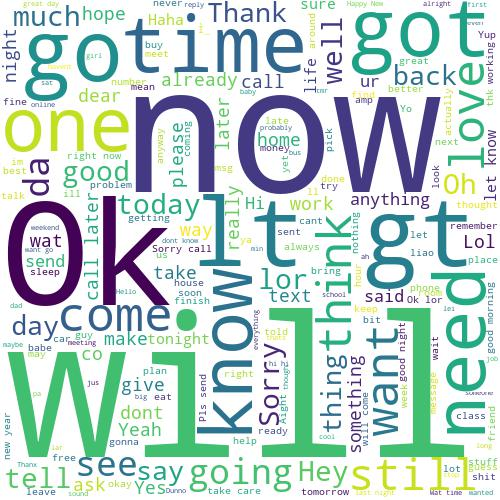

In [27]:
Image("img/ham_wordcloud.jpg")

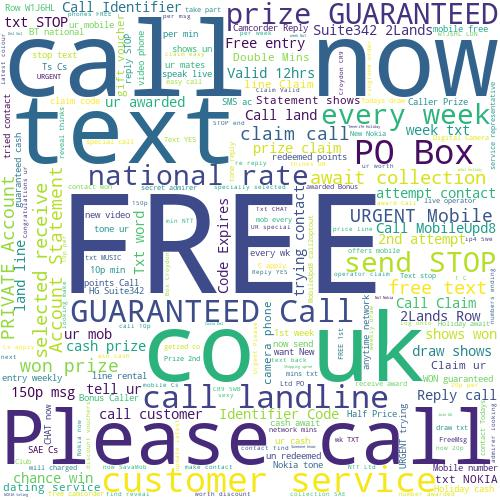

In [30]:
Image("img/spam_wordcloud.jpg")

In [ ]:
# generate the clean list
translator = str.maketrans('', '', string.punctuation)
text = [line.translate(translator).lower() for line in text]
test_text = [line.translate(translator).lower() for line in test_text]
# count the words
vectorizer = CountVectorizer()
word_count = vectorizer.fit_transform(text)

count = np.array(word_count.toarray())

# for word, count in zip(vectorizer.get_feature_names(), np.sum(count, axis=0)):
#     print(word, count)

In [ ]:
# train the classifier
classifier = MultinomialNB()
classifier.fit(word_count, tags)

test = vectorizer.transform(test_text)
prediction = classifier.predict(test)

print(prediction)